In [1]:
from sklearn.datasets import fetch_california_housing

In [2]:
import numpy as np
import pandas as pd # Для работы с данными
import scipy.stats # При работе со статистикой
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings("ignore") # Библиотека для визуализации результатов 
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
data = datasets.fetch_california_housing(as_frame=True).frame
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [4]:
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [34]:
data.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [52]:
data.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [5]:
from sklearn.pipeline import make_pipeline # используем пайплайны для удобства
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

model = make_pipeline(StandardScaler(), LinearRegression())
    

In [6]:
selectedColumns = data [['HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal']]
X = pd.get_dummies (selectedColumns)
del X ['MedHouseVal']
X.head()

,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [7]:
y=pd.Series(data=(data['MedHouseVal']))
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
model.fit(X_train, y_train)
predictions1 = model.predict(X_test)
predictions2 = model.predict(X_train)

In [10]:
model.score(X_train, y_train) 

0.3975485501036736

In [11]:
model.score(X_test, y_test) 

0.40632573422682083

In [14]:
 rmse2 = np.sqrt(mean_squared_error(y_train, predictions2))
 r2_train = r2_score(y_train, predictions2)
 rmse1= np.sqrt(mean_squared_error(y_test, predictions1))
 r2_test = r2_score(y_test, predictions1)


In [15]:
 rmse2,r2_train,rmse1,r2_test

(0.8974095898096691,
 0.3975485501036736,
 0.8820181902998079,
 0.40632573422682083)

In [17]:
def get_boxplot(X, columns=[]):
    for i in columns:
        sns.boxplot(x=X[i])
    pass  

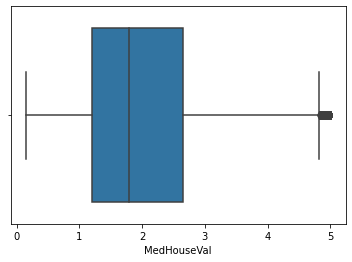

In [18]:
get_boxplot(data, ["MedHouseVal"]) #выбросы есть,возьмем до 4.8

In [19]:
data[data["MedHouseVal"]>4.8] #1079 это выбросы

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
89,1.2434,52.0,2.929412,0.917647,396.0,4.658824,37.80,-122.27,5.00001
140,6.3624,30.0,5.615385,0.730769,126.0,2.423077,37.81,-122.18,4.83300
459,1.1696,52.0,2.436000,0.944000,1349.0,5.396000,37.87,-122.25,5.00001
489,3.0417,48.0,4.690632,1.126362,1656.0,3.607843,37.86,-122.25,4.89600
493,7.8521,52.0,7.794393,1.051402,517.0,2.415888,37.86,-122.24,5.00001
...,...,...,...,...,...,...,...,...,...
20422,5.1457,35.0,6.958333,1.217593,576.0,2.666667,34.14,-118.90,5.00001
20426,10.0472,11.0,9.890756,1.159664,415.0,3.487395,34.18,-118.69,5.00001
20427,8.6499,4.0,7.236059,1.032528,5495.0,2.553439,34.19,-118.80,5.00001
20436,12.5420,10.0,9.873315,1.102426,1179.0,3.177898,34.21,-118.69,5.00001


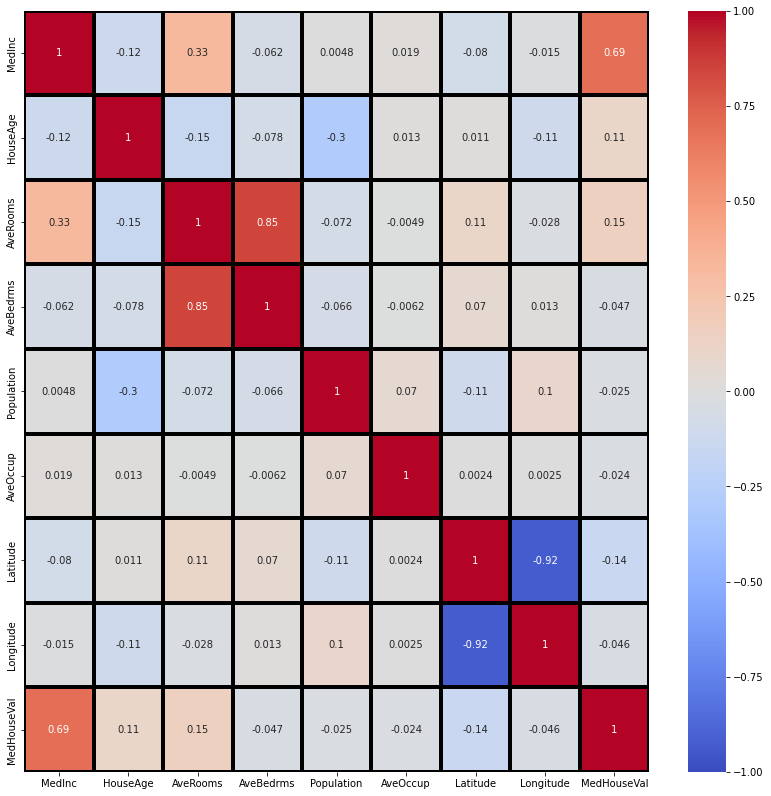

In [20]:
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(corr_matrix, annot = True, vmin=-1, vmax=1, center=0, cmap= 'coolwarm', linewidths=3,linecolor='black', ax=ax)

In [21]:
 #сильная корреляцию  между признаками AveRooms и AveBedrms

X2 = data.loc[:, (data.columns != "MedHouseVal")&(data.columns != "AveRooms")]
y2 = data[["MedHouseVal"]]


In [23]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [24]:
model.fit(X2_train, y2_train)
predictionsK1 = model.predict(X2_test)
predictionsK2 = model.predict(X2_train)

In [25]:
model.score(X2_train, y2_train)  #здесь намного лучше

0.6043614091244852

In [26]:
model.score(X2_test, y2_test) 

0.5799358837198175

In [32]:
 rmse2 = np.sqrt(mean_squared_error(y2_train, predictionsK2)) #на данные метрики существенно  повлияло, r2 ближе к 1
 r2_train = r2_score(y2_train, predictionsK2)
 rmse1= np.sqrt(mean_squared_error(y2_test, predictionsK1))
 r2_test = r2_score(y2_test, predictionsK1)
 rmse2,r2_train,rmse1,r2_test

(0.7272420835082768,
 0.6043614091244852,
 0.7419270782296468,
 0.5799358837198175)

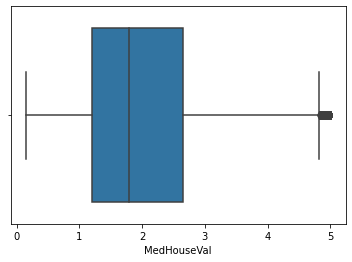

In [31]:
new= data.loc[:, data.columns != "AveRooms"] #но выбросы все равно есть
get_boxplot(new, ["MedHouseVal"])

In [41]:
new_data = new[new.MedHouseVal < 4.8]
X3 = new.loc[:, (new_data.columns != "MedHouseVal")&(new_data.columns != "AveRooms")]
y3 = new[["MedHouseVal"]]


In [42]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

In [43]:
model.fit(X3_train, y3_train)
predictionsV1 = model.predict(X3_test)
predictionsV2 = model.predict(X3_train)

In [44]:
model.score(X3_train, y3_train)  

0.6043614091244852

In [45]:
model.score(X3_test, y3_test) 

0.5799358837198175

In [40]:
 rmse3 = np.sqrt(mean_squared_error(y3_train, predictionsV2)) # не существенные изменения
 r3_train = r2_score(y3_train, predictionsV2)
 rmse31= np.sqrt(mean_squared_error(y3_test, predictionsV1))
 r3_test = r2_score(y3_test, predictionsV1)
 rmse3,r3_train,rmse31,r3_test

(0.732788039494785, 0.5983041120128634, 0.7400826977370136, 0.5820217896973191)

In [46]:
data['HouseAge'] = np.log(data['HouseAge'])
data['AveOccup'] = np.sqrt(data['AveOccup'])


In [47]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,3.713572,6.984127,1.023810,322.0,1.598611,37.88,-122.23,4.526
1,8.3014,3.044522,6.238137,0.971880,2401.0,1.452529,37.86,-122.22,3.585
2,7.2574,3.951244,8.288136,1.073446,496.0,1.673995,37.85,-122.24,3.521
3,5.6431,3.951244,5.817352,1.073059,558.0,1.596228,37.85,-122.25,3.413
4,3.8462,3.951244,6.281853,1.081081,565.0,1.476979,37.85,-122.25,3.422


In [54]:

X4 = data.loc[:, (data.columns != "MedHouseVal")]
y4 = data[["MedHouseVal"]]

In [55]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=42)

In [56]:
model.fit(X4_train, y4_train)
predictionsl1 = model.predict(X4_test)
predictionsl2 = model.predict(X4_train)

In [57]:
model.score(X4_train, y4_train)  

0.6244234270950016

In [58]:
model.score(X4_test, y4_test) 

0.5964608932337658

In [59]:
 rmse4 = np.sqrt(mean_squared_error(y4_train, predictionsl2)) # математические манипуляции улучшили метрики качества
 r4_train = r2_score(y4_train, predictionsl2)
 rmsel1= np.sqrt(mean_squared_error(y4_test, predictionsl1))
 r4_test = r2_score(y4_test, predictionsl1)
 rmse4,r4_train,rmsel1,r4_test

(0.7085637441458215,
 0.6244234270950016,
 0.7271872307582046,
 0.5964608932337658)